### LOAD PACKAGES

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Georgia' , 'font.size': 14 , 'mathtext.fontset' : 'stix'}),
import cv2   # CATCH CIRCLE, READ IMAGE 
# import pandas as pd
# import math
# from IPython.display import Markdown, display, Math, Latex

### CATCH THE CIRCLE TO ALIGN ALL PICTURES

In [12]:
# A. READ IMAGE
FileName = 'Edges2';

img = cv2.imread((FileName + '.jpg') , 0);   # IMAGE READ
img[img > 5] = 255;   # image where greater than 5 become white

# B. DETECT CIRCLES
dp = 1;   minDist = 100;   param1 = 55;   param2 = 10;   minRadius = 6;   maxRadius = 10;
detected_circles = cv2.HoughCircles(img , cv2.HOUGH_GRADIENT , dp = dp , 
                                    minDist = minDist , param1 = param1 , param2 = param2 , 
                                    minRadius = minRadius , maxRadius = maxRadius);
print('In total we found : ' + str(len(detected_circles[0])) + ' posibilities.')
display(detected_circles)

# C. PICK THE ONE IN GOOD RANGE ([250,400,600,750]) ---> SHOULD BE ONLY ONE IN THE END
pos = np.where( (400 >= detected_circles[0][:,0]) & (detected_circles[0][:,0] >= 250) & (detected_circles[0][:,1] >= 600) & (750 >= detected_circles[0][:,1]));
detected_circles_final = detected_circles[0][pos[0][0]];
print('\nFinal option : ') 
display(detected_circles_final)

# D. EXPORT AS NEW IMAGE
Img_New = img[round(detected_circles_final[1]) - 300:round(detected_circles_final[1]) + 2900 , round(detected_circles_final[0]) - 200 : round(detected_circles_final[0]) + 1100]
cv2.imwrite(('New/' + FileName + '_out.jpg'), Img_New)


In total we found : 3 posibilities.


array([[[1355.5,  207.5,    8.2],
        [ 366.5,  657.5,    9.4],
        [ 600.5, 3290.5,    9.4]]], dtype=float32)


Final option : 


array([366.5, 657.5,   9.4], dtype=float32)

True

In [15]:
detected_circles_final[1]


657.5

### FIGURE : CHECK IF IT IS WELL CAPTURED

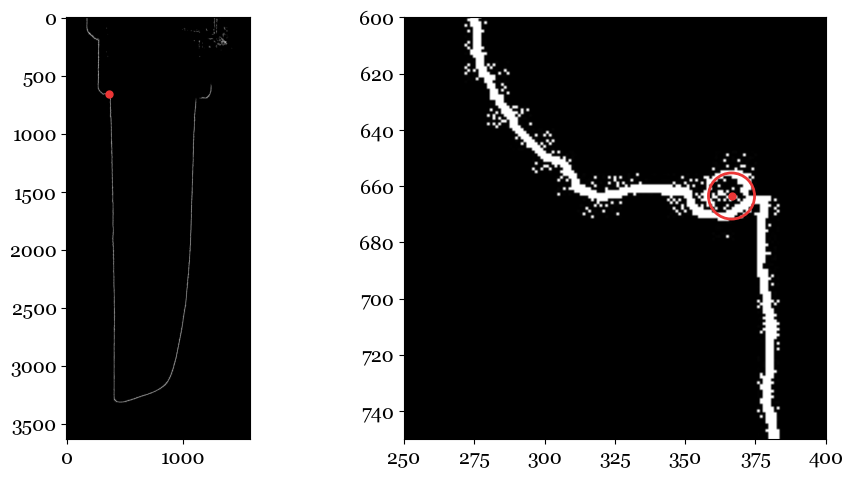

In [10]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
# FIGURE(1) : FULL SCALE
ax[0].imshow(img , cmap = 'gray')
ax[0].plot(detected_circles[0][:,0] , detected_circles[0][:,1] , 'o' , markersize = 3 , color = '#C77676')
ax[0].plot(detected_circles_final[0] , detected_circles_final[1] , 'o' , markersize = 5 , color = '#EC3636')

# FIGURE(2) : ZOOM IN SCALE 
ax[1].imshow(img , cmap = 'gray')
ax[1].plot(detected_circles_final[0] , detected_circles_final[1] , 'o' , markersize = 5 , color = '#EC3636')
ax[1].axis([250,400,750,600])
circle = plt.Circle((detected_circles_final[0] , detected_circles_final[1]) , detected_circles_final[2] , color = '#EC3636' , fill = False , lw = 2.0)
ax[1].add_patch(circle)

fig.tight_layout()

### RELOAD AND SHOW

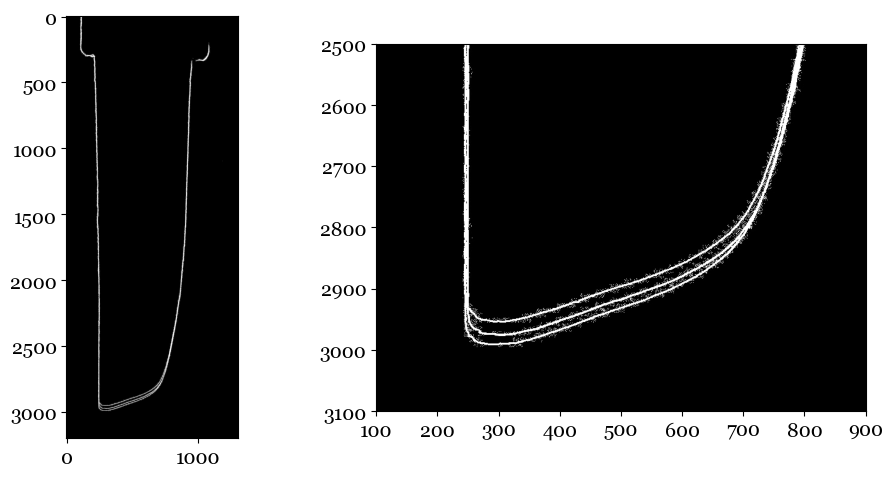

In [13]:
# READ IMAGE
FileName = 'Edges1';
frame0 = cv2.imread('New/' + FileName + '_out.jpg' , 0)

# LONG EXPOSURE
numPics = 2;
for numPics in [2,3]:
    frame1 = cv2.imread('New/Edges%d_out.jpg' % numPics  , 0)
    frame0 = np.maximum(frame0 , frame1);

# IMAGE SHOW
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(frame0 , cmap = 'gray')
ax[1].imshow(frame0 , cmap = 'gray')
ax[1].axis([100,900,3100,2500])
fig.tight_layout()